In [1]:
#importing the libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
#building CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
epochs = 10
h = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0469 - accuracy: 0.9855 - val_loss: 0.0376 - val_accuracy: 0.9883
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0278 - val_accuracy: 0.9915
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0227 - accuracy: 0.9924 - val_loss: 0.0417 - val_accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0340 - val_accuracy: 0.9901
Epoch 5/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0384 - val_accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0318 - val_accuracy: 0.9923
Epoch 7/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0401 -

In [8]:
import numpy as np

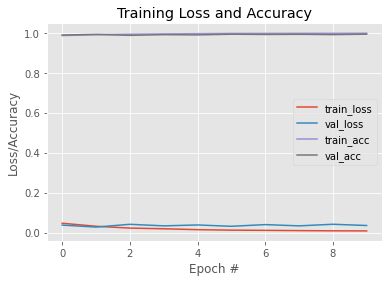

In [11]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()